In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.6


In [3]:
def build_box(robot,x,y,name=''):
    width=2
    thickness=0.5
    
    b1=Box(robot,
        x=0+x,
        y=width/2+thickness+y,
         width=width,height=thickness,
        name=name+':top')
    b2=Box(robot,
        x=0+x,
        y=-width/2-thickness+y,
         width=width,height=thickness,
        name=name+':bottom')
    b3=Box(robot,
        x=-width/2-thickness+x,
        y=0+y,
         width=thickness,height=width,
        name=name+':left')
    b4=Box(robot,
        x=+width/2+thickness+x,
        y=0+y,
         width=thickness,height=width,
        name=name+':right')
    
    connect(b1,[b2,b3,b4],'weld')
    
    return [b1,b2,b3,b4]

def build(robot):
    
    y=rand()*9+3
    bob=build_box(robot,4,y,'bob')
    
    disk=Disk(robot,4,y,radius=0.8,name='bob:center')  # radius = 0.5 default
    
    connect(disk,bob,'distance')
    distances=robot.distances=[-1]*360    
    
    elbow_left=Disk(robot,5.5,y+1.5,radius=0.3,name='bob:elbow_left')
    elbow_right=Disk(robot,5.5,y-1.5,radius=0.3,name='bob:elbow_right')
    connect(elbow_left,bob,'distance')
    connect(elbow_right,bob,'distance')
    
    width=2
    b1=Box(robot,
        x=5.8+width/2,
        y=y+1.5,
         width=width,height=.3,
        name='bob:arm_left')
    
    connect(elbow_left,b1,'weld')

    
    b1=Box(robot,
        x=5.8+width/2,
        y=y-1.5,
         width=width,height=.3,
        name='bob:arm_right')
    
    connect(elbow_right,b1,'weld')
    
    return robot



In [4]:
def act(t,robot):

    
    robot.message=robot['bob:center'].read_distance()
    
    if t<5:
        return
    
    robot['bob:right'].F=0.5
    
    if t<10:
        robot['bob:elbow_left'].τ=.2
        robot['bob:elbow_right'].τ=-.2
        return
    
    
    if t<20:
        robot['bob:elbow_left'].τ=-.2
        robot['bob:elbow_right'].τ=.2
        return
    

    

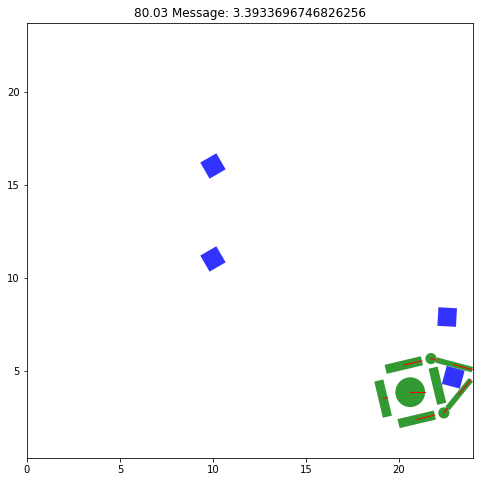

In [8]:
env=Environment(24,24) 
robot=Robot(env)

robot=build(robot)


for y in arange(1,20,5):
    Box(env,10,y,width=1,height=1,angle=30,density=0.001)

run_sim(env,act,
        total_time=80,  # seconds
        dt=1/60,
        dt_display=1,  # make this larger for a faster display
        plot_orientation=True,
        figure_width=8,
       )